In [2]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm

In [3]:
samples_nano = [
    "TTJets",
    
    "4mu_500GeV_5p0GeV_0p08mm",
    "4mu_500GeV_5p0GeV_0p8mm",
    "4mu_500GeV_5p0GeV_8p0mm",
    "4mu_500GeV_5p0GeV_40p0mm",
    "4mu_500GeV_5p0GeV_80p0mm",
]

In [4]:
fileset = utilities.make_fileset(samples_nano, "llpNanoAOD_v2", max_files=1)

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    #maxchunks=1,
)

channels = ["base"]
p = sidm_processor.SidmProcessor(
    channels,
    ["base"],
    lj_reco_choices=["0.4"],
    llpnanoaod=True,
)

output = runner.run(fileset, treename="Events", processor_instance=p)
out = output["out"]

Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


In [6]:
BKG = output["out"][samples_nano[0]]["hists"]
SIG_1 = output["out"][samples_nano[1]]["hists"]
SIG_2 = output["out"][samples_nano[2]]["hists"]
SIG_3 = output["out"][samples_nano[3]]["hists"]
SIG_4 = output["out"][samples_nano[4]]["hists"]
SIG_5 = output["out"][samples_nano[5]]["hists"]

Text(0.5, 1.0, 'TTJets')

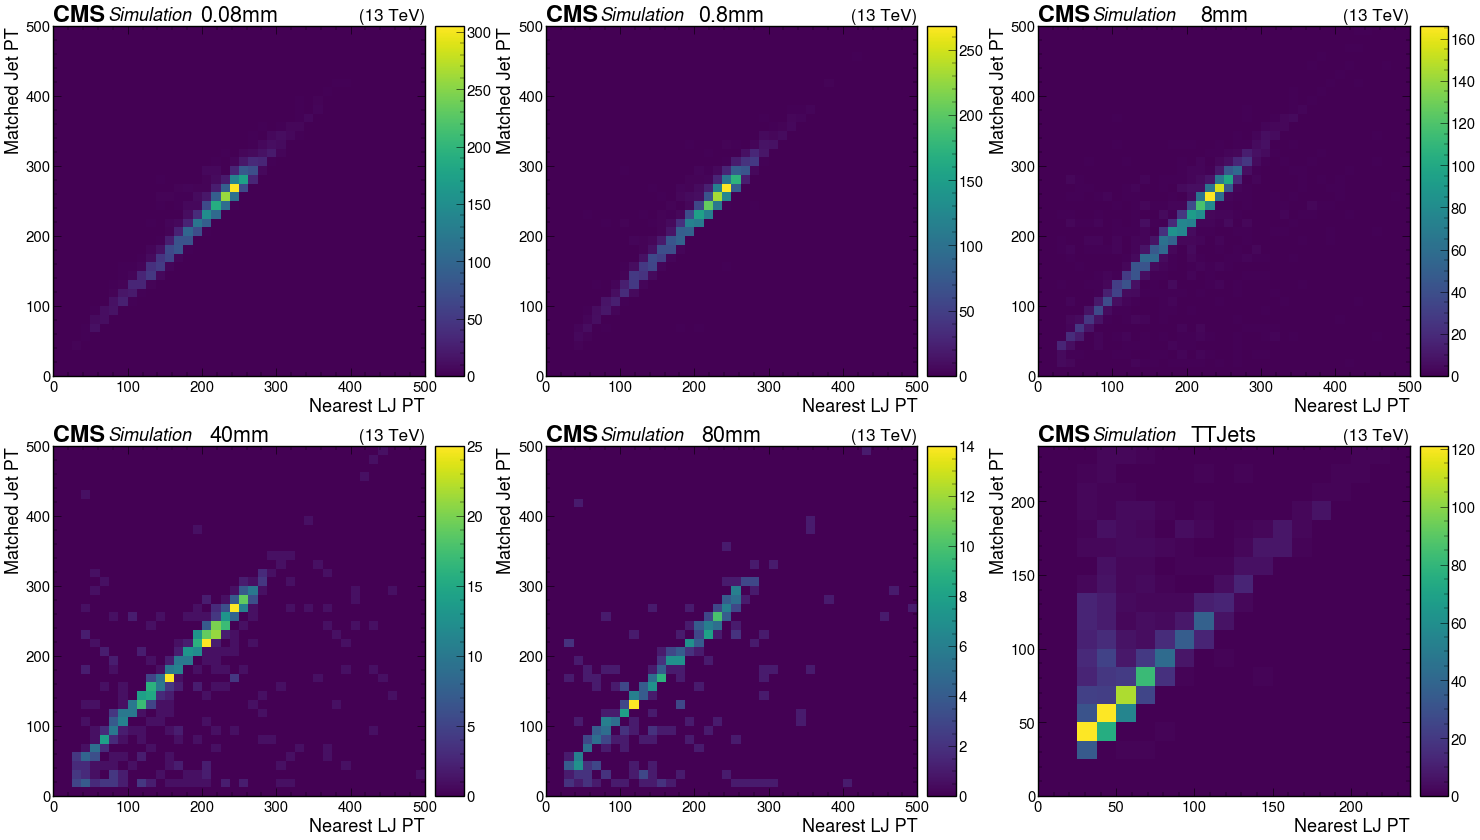

In [8]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*12, 20))

plt.subplot(2, nplots, 1)
utilities.plot(SIG_1["LJ_matchedjet_PT"][channels[0], :, :], flow='none')
plt.title("0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(SIG_2["LJ_matchedjet_PT"][channels[0], :, :], flow='none')
plt.title("0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(SIG_3["LJ_matchedjet_PT"][channels[0], :, :], flow='none')
plt.title("8mm")

plt.subplot(2, nplots, 4)
utilities.plot(SIG_4["LJ_matchedjet_PT"][channels[0], :, :], flow='none')
plt.title("40mm")

plt.subplot(2, nplots, 5)
utilities.plot(SIG_5["LJ_matchedjet_PT"][channels[0], :, :], flow='none')
plt.title("80mm")

plt.subplot(2, nplots, 6)
utilities.plot(BKG["LJ_matchedjet_PT"][channels[0], :240j, :240j], flow='none')
plt.title("TTJets")

Text(0.5, 1.0, 'TTJets')

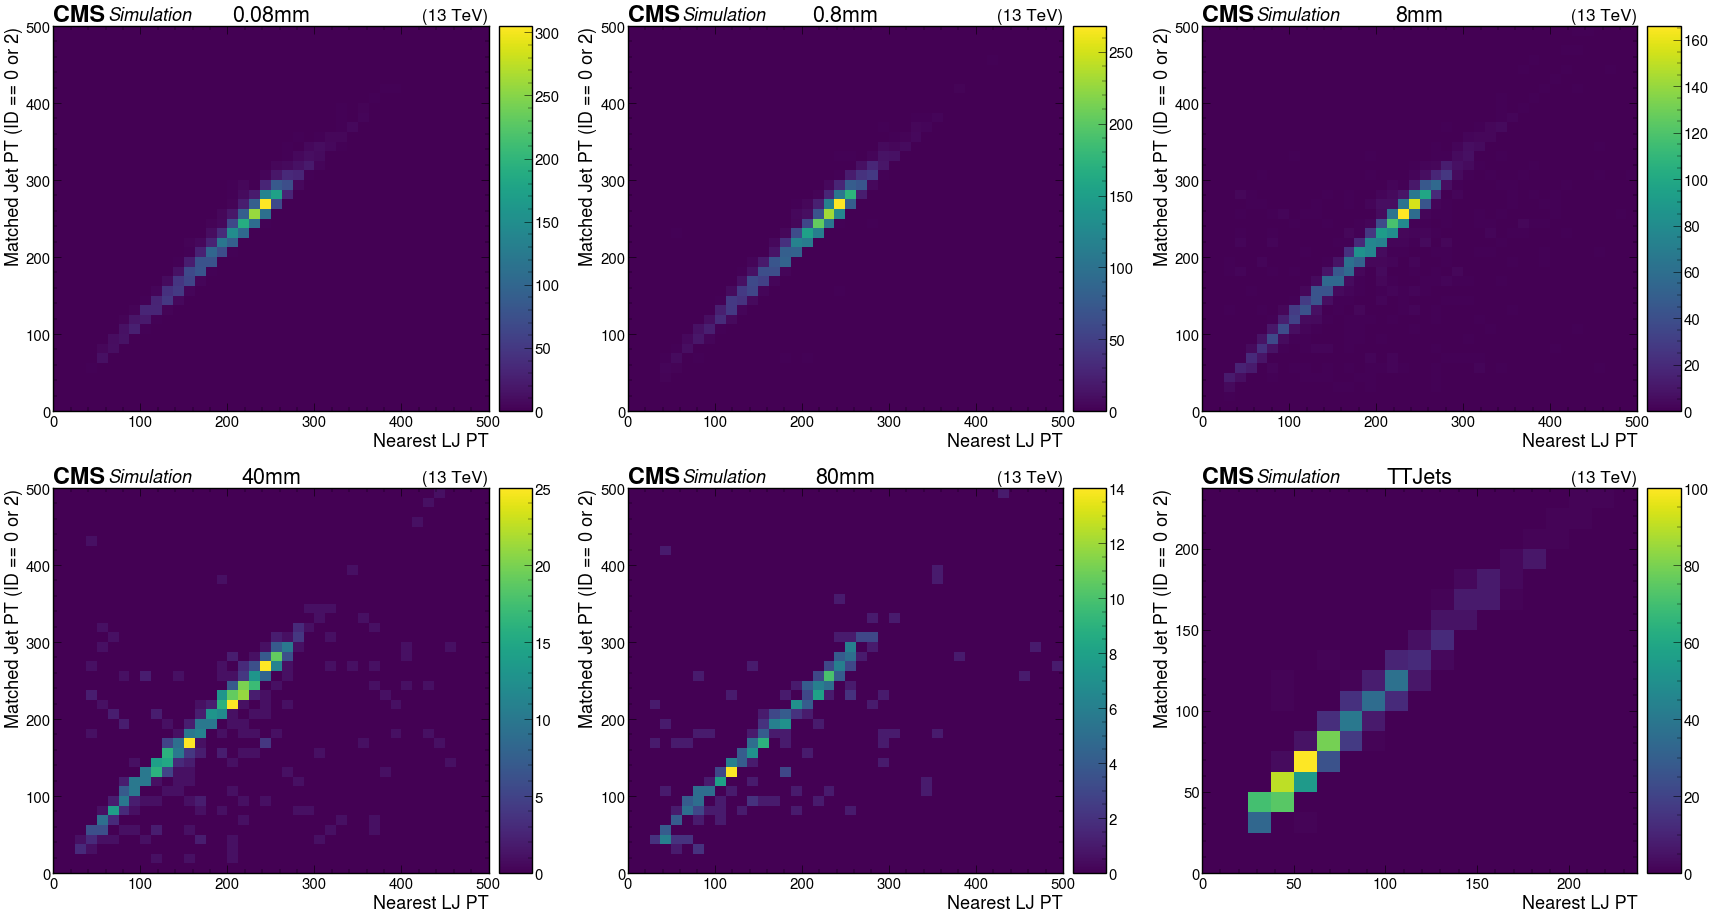

In [9]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(SIG_1["LJ_matchedjet_PT02"][channels[0], :, :], flow='none')
plt.title("0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(SIG_2["LJ_matchedjet_PT02"][channels[0], :, :], flow='none')
plt.title("0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(SIG_3["LJ_matchedjet_PT02"][channels[0], :, :], flow='none')
plt.title("8mm")

plt.subplot(2, nplots, 4)
utilities.plot(SIG_4["LJ_matchedjet_PT02"][channels[0], :, :], flow='none')
plt.title("40mm")

plt.subplot(2, nplots, 5)
utilities.plot(SIG_5["LJ_matchedjet_PT02"][channels[0], :, :], flow='none')
plt.title("80mm")

plt.subplot(2, nplots, 6)
utilities.plot(BKG["LJ_matchedjet_PT02"][channels[0], :240j, :240j], flow='none')
plt.title("TTJets")

Text(0.5, 1.0, 'TTJets')

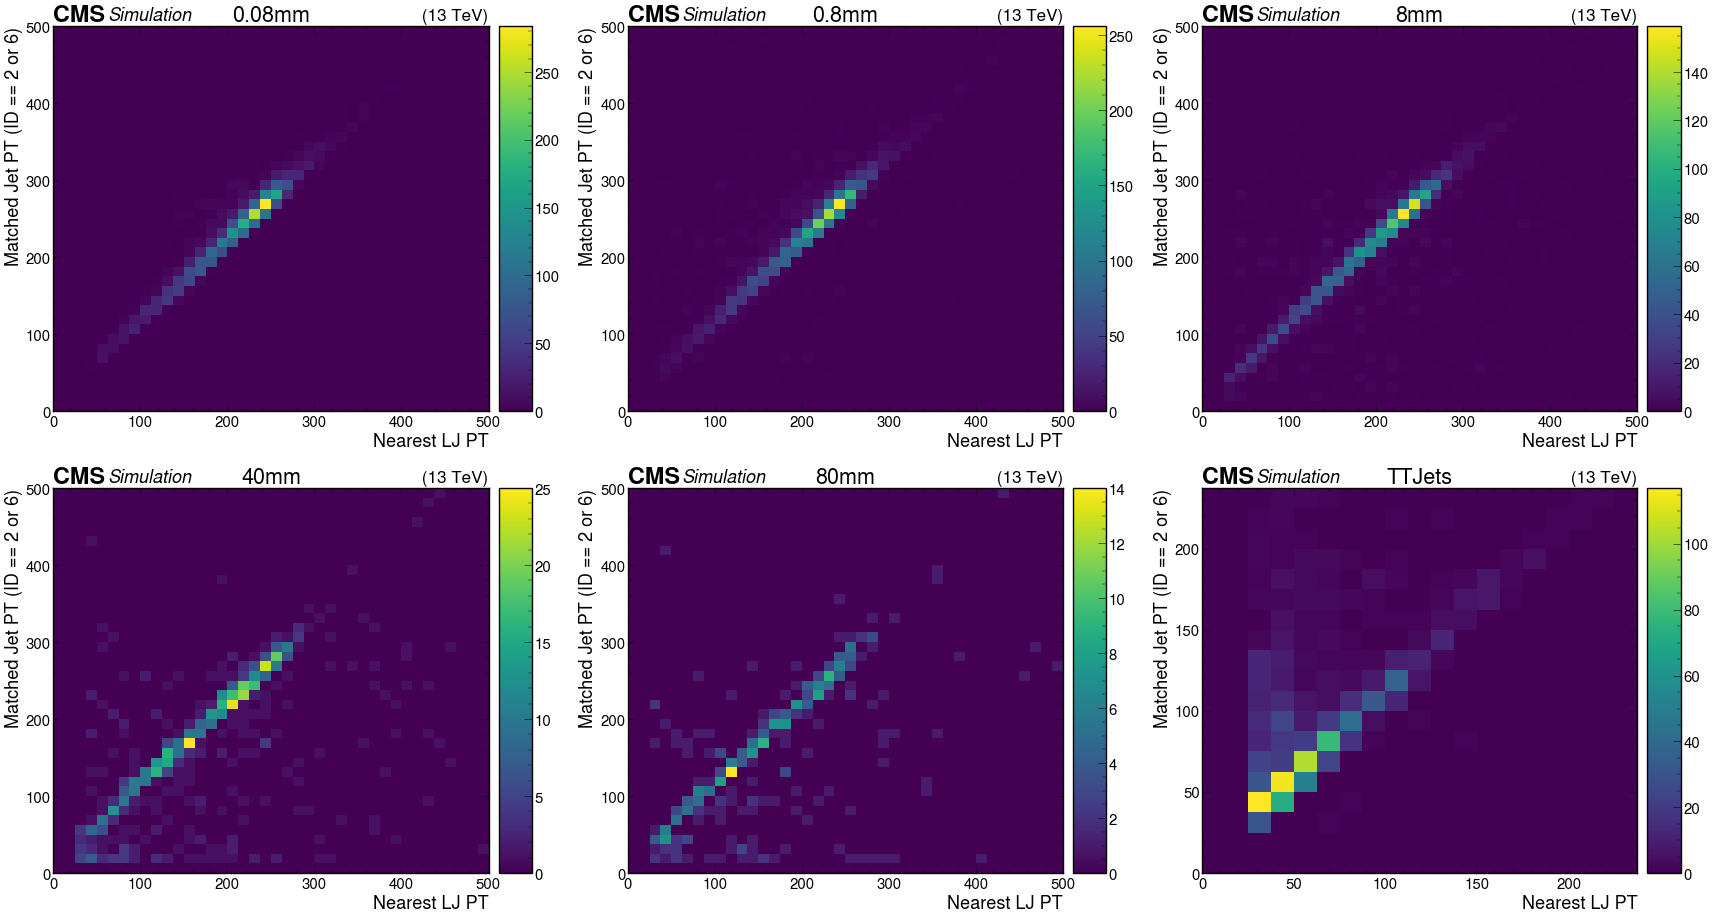

In [10]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(SIG_1["LJ_matchedjet_PT26"][channels[0], :, :], flow='none')
plt.title("0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(SIG_2["LJ_matchedjet_PT26"][channels[0], :, :], flow='none')
plt.title("0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(SIG_3["LJ_matchedjet_PT26"][channels[0], :, :], flow='none')
plt.title("8mm")

plt.subplot(2, nplots, 4)
utilities.plot(SIG_4["LJ_matchedjet_PT26"][channels[0], :, :], flow='none')
plt.title("40mm")

plt.subplot(2, nplots, 5)
utilities.plot(SIG_5["LJ_matchedjet_PT26"][channels[0], :, :], flow='none')
plt.title("80mm")

plt.subplot(2, nplots, 6)
utilities.plot(BKG["LJ_matchedjet_PT26"][channels[0], :240j, :240j], flow='none')
plt.title("TTJets")

In [7]:
eff_hist_bkg_02, errors_bkg_02 = utilities.get_eff_hist(BKG["LJ_matchedjet_PT02"]['base',:240j,:240j], BKG["LJ_matchedjet_PT"]['base',:240j,:240j])
eff_hist_sig1_02, errors_sig1_02 = utilities.get_eff_hist(SIG_1["LJ_matchedjet_PT02"]['base',:,:], SIG_1["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig2_02, errors_sig2_02 = utilities.get_eff_hist(SIG_2["LJ_matchedjet_PT02"]['base',:,:], SIG_2["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig3_02, errors_sig3_02 = utilities.get_eff_hist(SIG_3["LJ_matchedjet_PT02"]['base',:,:], SIG_3["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig4_02, errors_sig4_02 = utilities.get_eff_hist(SIG_4["LJ_matchedjet_PT02"]['base',:,:], SIG_4["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig5_02, errors_sig5_02 = utilities.get_eff_hist(SIG_5["LJ_matchedjet_PT02"]['base',:,:], SIG_5["LJ_matchedjet_PT"]['base',:,:])

/home/cms-jovyan/workspace/DY_processor_with_LLPNanoAOD/sidm/DY_studies/../../sidm/tools/utilities.py:17: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


Text(0.5, 1.0, 'TTJets')

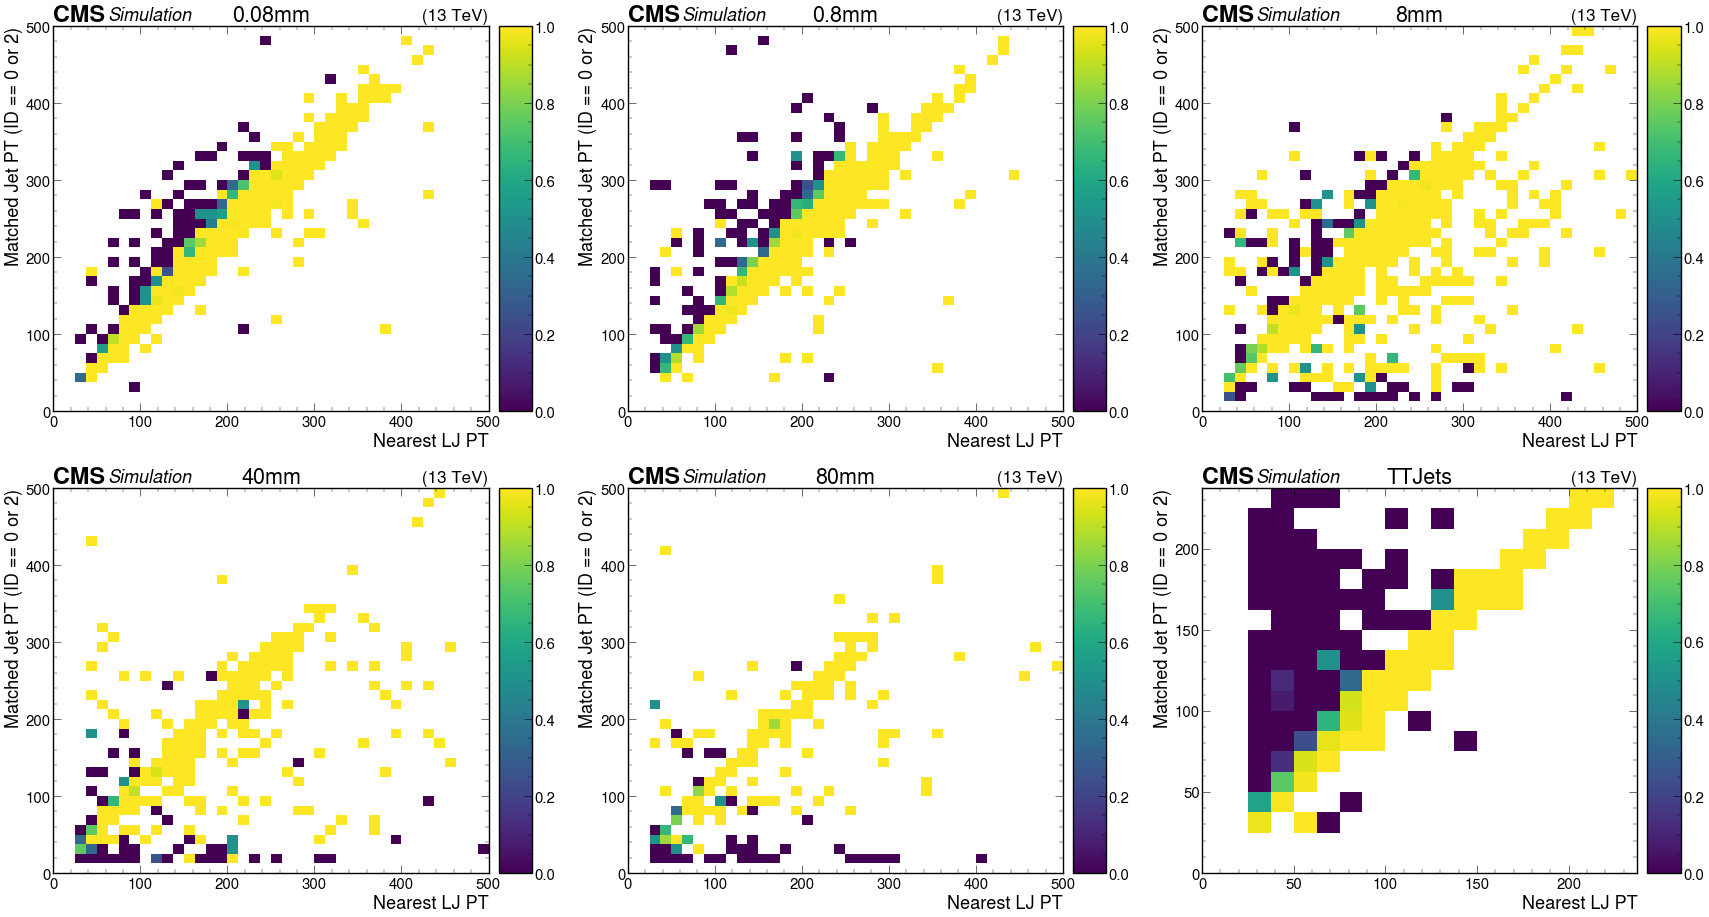

In [8]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(eff_hist_sig1_02)
plt.title("0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(eff_hist_sig2_02)
plt.title("0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(eff_hist_sig3_02)
plt.title("8mm")

plt.subplot(2, nplots, 4)
utilities.plot(eff_hist_sig4_02)
plt.title("40mm")

plt.subplot(2, nplots, 5)
utilities.plot(eff_hist_sig5_02)
plt.title("80mm")

plt.subplot(2, nplots, 6)
utilities.plot(eff_hist_bkg_02)
plt.title("TTJets")

In [9]:
eff_hist_bkg_26, errors_bkg_26 = utilities.get_eff_hist(BKG["LJ_matchedjet_PT26"]['base',:240j,:240j], BKG["LJ_matchedjet_PT"]['base',:240j,:240j])
eff_hist_sig1_26, errors_sig1_26 = utilities.get_eff_hist(SIG_1["LJ_matchedjet_PT26"]['base',:,:], SIG_1["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig2_26, errors_sig2_26 = utilities.get_eff_hist(SIG_2["LJ_matchedjet_PT26"]['base',:,:], SIG_2["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig3_26, errors_sig3_26 = utilities.get_eff_hist(SIG_3["LJ_matchedjet_PT26"]['base',:,:], SIG_3["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig4_26, errors_sig4_26 = utilities.get_eff_hist(SIG_4["LJ_matchedjet_PT26"]['base',:,:], SIG_4["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig5_26, errors_sig5_26 = utilities.get_eff_hist(SIG_5["LJ_matchedjet_PT26"]['base',:,:], SIG_5["LJ_matchedjet_PT"]['base',:,:])

Text(0.5, 1.0, 'TTJets')

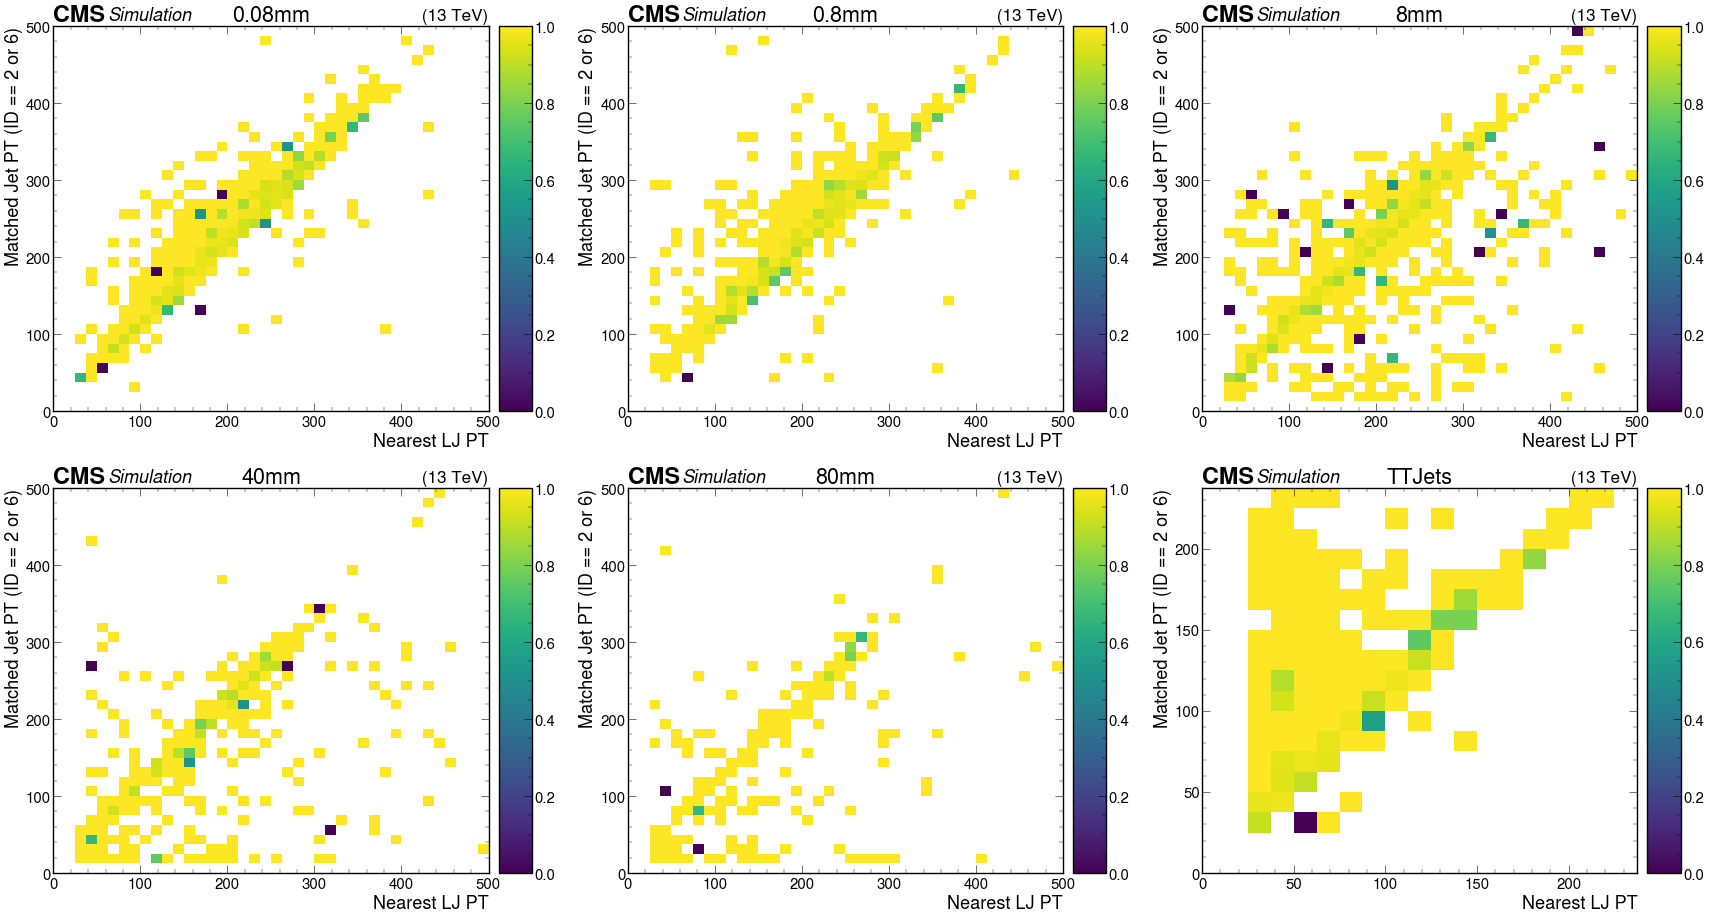

In [10]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(eff_hist_sig1_26)
plt.title("0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(eff_hist_sig2_26)
plt.title("0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(eff_hist_sig3_26)
plt.title("8mm")

plt.subplot(2, nplots, 4)
utilities.plot(eff_hist_sig4_26)
plt.title("40mm")

plt.subplot(2, nplots, 5)
utilities.plot(eff_hist_sig5_26)
plt.title("80mm")

plt.subplot(2, nplots, 6)
utilities.plot(eff_hist_bkg_26)
plt.title("TTJets")